<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right"></IMG>
</figure>

# Python Notebook #6


## Table of Contents
<ul>
    <li> <a href="#6.1">6.1 pandas</a><br>
     <li>   <a href = '#series'>6.2 Series</a><br>
     <li>   <a href='#dataframes'>6.3 DataFrame</a><br>
     <li>   <a href='#importing'>6.4 Importing data into DataFrames and exploring its attributes</a><br>
      <li>  <a href='#statistics'>6.5 Statistics with pandas</a>
</ul>

<div id="6.1"></div><br><h2>6.1 <code>pandas</code></h2><br><div style="text-align: justify">With the standard Python functions and the <b><code>numpy</code></b> library, you already have access to powerful tools to process data. However, you'll find that organizing data using them might still be confusing and messy... so let us introduce you to <b><code>pandas</code></b>: a Python library specialized in data organization. Its functions are simple to use, and they achieve a lot. Furthermore, <b><code>pandas</code></b> was built on top of the <b><code>numpy</code></b> library, using some of their functions and data structures. This makes <b><code>pandas</code></b> fast. The <b><code>pandas</code></b> library is often used in Data Science and Machine Learning to organize data that are used as input in other functions, of other libraries. For example, you store and organize an Excel file using <b><code>pandas</code></b> data structures, apply statistical analysis using <b><code>SciPy</code></b>, and then plot the result using <b><code>matplotlib</code></b>.<br><br> In this section, we'll introduce you to the basic <b><code>pandas</code></b> data structures: the <b><code>Series</code></b> and <b><code>DataFrame</code></b> objects; and how to store data in them. In <b><code>pandas</code></b>, a <b><code>Series</code></b> represents a list, and <b><code>DataFrame</code></b> represents a table.</div>

In [ ]:
# as always, let's import some libraries

import pandas as pd 
import numpy as np # we'll use numpy only for comparison

<div id="series"></div><br><h3>6.2 <code>Series</code></h3><br><div style="text-align: justify">We start with <b><code>pandas Series</code></b>, since a <b><code>DataFrame</code></b> is made out of <b><code>Series</code></b>; retrieving a row or a column from a <b><code>DataFrame</code></b> results in a <b><code>Series</code></b>. A <b><code>Series</code></b> object is a <b><code>numpy</code></b> ndarray used to hold one-dimensional data, like a list.  We create a <b><code>Series</code></b> object using its constructor <b><code>pd.Series()</code></b>. It can be called by using a list that you want to convert into a <b><code>pandas series</code></b>. Unlike <b><code>numpy</code></b> arrays, a <b><code>Series</code></b> may hold data of different types.</div>

In [ ]:
# Create a list containing elements of various types:
my_list = ['begin', 2, 3/4, "end"]

# Construct a Series and a numpy.array using our list:
my_series = pd.Series(data=my_list)
my_nparray = np.array(my_list)

# Compare the type of each element in my_series and my_nparray
for i in range(len(my_list)):
    print('----type of each element----')
    print(f'my_series element #{i} => {type(my_series[i])}')
    print(f'my_nparray element #{i} => {type(my_nparray[i])}\n')

<div style="text-align: justify">As expected, the <b><code>numpy</code></b> array changed all elements to one type; in this case, strings. As mentioned in Section 5.1, in Notebook 5, a <b><code>numpy</code></b> array cannot hold data of different types.</div>

In [ ]:
# Note that a pandas series is, by default, printed more elaborately 
# showing each element's index

print(my_series)
print('-----------------')
print(my_nparray)

The values of a series can be accessed and sliced using the **``iloc()``** function: 

In [ ]:
my_series.iloc[1:]

In [ ]:
my_series.iloc[[2,len(my_series)-1]]

<h4>Labeling <code>Series</code></h4><br><div style="text-align: justify">So far we have referred to values within a list or array using indexing, but that might be confusing. With <b><code>pandas Series</code></b>, you can refer to your values by labeling their indices. Labels allow you to access the values in a more informative way, similar to dictionaries; depicted in Section 2.3, in Notebook 2.</div>

In [ ]:
# Create the indices of the same size as the list 
# we want to construct our Series object with.

my_index_labels = ["My first entry", "1","2","END"]

# Use the index option in the Series constructor
my_labeled_Series = pd.Series(data=my_list, index=my_index_labels)

# Note that our entries can be called both ways
print(my_labeled_Series[0] == my_labeled_Series["My first entry"])

<div style="text-align: justify"><b><code>pandas</code></b> can automatically create labels of indices if we construct a <b><code>Series</code></b> using a dictionary with labeled entries.</div>

In [ ]:
my_dictionary = {"a list": [420, 10],"a float": 380/3, "a list of strings": ["first word", "Second Word", "3rd w0rd"] }
my_Series = pd.Series(my_dictionary)
print(my_Series)

In [ ]:
# We can access an element within the list labeled "a list of strings" 
# by using its label followed by the desired index

my_Series["a list of strings"][1]

<div class="alert alert-block alert-info"><b>Exercise 6.2.1</b><br><br><div style="text-align: justify">Finish a function, which with a <code>for</code> loop will get all types saved in series <code>my_series</code>.</div></div>

In [ ]:
'''write your code here'''

def list_types(series):
    series_types = "Types inside series:\n"
    for ...
        item_type = ...
        series_types += str(item_type) + '\n'
    
    return series_types
        
###BEGIN SOLUTION TEMPLATE=
def list_types(series):
    series_types = "Types inside series:\n"
    for i in range(len(series)):
        item_type = type(series[i])
        series_types += str(item_type) + '\n'
    
    return series_types
###END SOLUTION

print(list_types(my_series))

In [ ]:
###BEGIN HIDDEN TESTS
def solution_6_2_1(series):
    series_types = "Types inside series:\n"
    for i in range(len(series)):
        item_type = type(series[i])
        series_types += str(item_type) + '\n'
    
    return series_types

assert list_types(my_series) == solution_6_2_1(my_series), '6.2.1 - Incorrect answer'
###END HIDDEN TESTS

<div style="text-align: justify">Note the above exercise could have been solved without a <b><code>for</code></b> loop:</div>

In [ ]:
types = my_series.apply(type)
print(types)

<div class="alert alert-block alert-warning"><center>When using <code>pandas</code>, it's a good idea to try and avoid <code>for</code> loops or iterative solutions; <code>pandas</code> usually has a faster solution than iterating through its elements.</center></div>

<div id="dataframes"></div><br><h3>6.3 <code>DataFrame</code></h3><br><div style="text-align: justify">A <b><code>DataFrame</code></b> is a data structure used to represent two-dimensional data. A common example of data organized in two dimensions are tables or two-dimensional arrays.</div>

<h4>From <code>Series</code> to columns of a <code>DataFrame</code> table</h4><br><div style="text-align: justify">Usually, <b><code>DataFrames</code></b> are made out of <b><code>Series</code></b>. However, its constructor accepts other types.</div> 

In [ ]:
# define a few series to represent individual rows:

row_1 = pd.Series(['Garnet', 7.0,   'Fracture', 3.9  ])
row_2 = pd.Series(['Graphite', 1.5, 'One', 2.3 ])
row_3 = pd.Series(['Kyanite', 6,    'One', 4.01   ])
row_4 = pd.Series(['test', 'bad', '@#$%^', False, "asdf"])
# data from: https://www.researchgate.net/figure/Selected-physical-properties-of-minerals-common-to-NYC-bedrock_tbl1_228544586

<div style="text-align: justify">By default, the <b><code>DataFrame</code></b> constructor creates rows with the elements of each <b><code>Series</code></b>:</div>

In [ ]:
# create DataFrame using multiple Series as rows

df2 = pd.DataFrame(data=[row_1, row_2, row_3, row_4]) 
# the name "df" is often used as a name for a dataframe object

df2

We can also create a <b><code>DataFrame</code></b> using <b><code>Series</code></b> as columns:

In [ ]:
# define series representing columns:
name = pd.Series(['Amphibole', 'Biotite', 'Calcite', 'Dolomite', 'Feldspars'])
hardness = pd.Series([5.5, 2.75, 3, 3, 6])
specific_gravity = pd.Series([2.8, 3.0, 2.72, 2.85, 2.645])
test = pd.Series(['A', 12j, True, 9, 11.00000])

# convert each series to a dataframe:
col_1 = name.to_frame(name='name') 
col_2 = hardness.to_frame(name='hardness')
col_3 = specific_gravity.to_frame(name='sp. gr.')
col_4 = test.to_frame(name='test')


<div style="text-align: justify">After creating each column, we can concatenate them together into one <b><code>DataFrame</code></b> table using the <b><code>pd.concat()</code></b> function. There are two axes in a <b><code>DataFrame</code></b>: '0' (or 'index') for the rows, and '1' (or 'columns') for the columns. We want to concatenate the series along their columns, so use <b><code>axis=1</code></b> (or <b><code>axis='columns'</code></b>).</div> 

In [ ]:
#concatenate the series into one dataframe:
df1 = pd.concat([col_1, col_2, col_3, col_4], axis=1)
df1

<div style="text-align: justify">Alternatively, you could use the <b><code>np.transpose()</code></b> function to generate the <b><code>DataFrame</code></b> using a <b><code>Series</code></b> as columns:</div>

In [ ]:
# transpose
df_T = pd.DataFrame(data=[name,hardness,specific_gravity,test]).T

# then label the columns
df_T.columns=['name', 'hardness', 'sp. gr.', 'test']

df_T

To create a new column, simply do:

In [ ]:
df1['new_column'] = np.nan
df1

<h4>Labeling <code>DataFrames</code></h4><br><div style="text-align: justify">You can also rename your columns' and rows' index names by changing your DataFrame's <b><code>columns</code></b> and <b><code>index</code></b> attributes, respectively. Recall our <b><code>df2</code></b>:</div>

In [ ]:
df2

Now let's rename its columns' and rows' index names.

In [ ]:
# renaming columns' index names
df2.columns = ['name', 'hardness',  'cleavage', 'sp. gr.','test']

# renaming rows' index names
df2.index = ['row0','row1','row2','row3']

df2 # calling df2 again

<h4>Concatenating <code>DataFrames</code></h4><br><div style="text-align: justify">We can also concatenate <b><code>DataFrames</code></b> to each other, even if they are of different sizes.</div>

In [ ]:
df3 = pd.concat([df1, df2])
print(df3)

<div style="text-align: justify">In the resulting table, we notice that <b><code>pandas</code></b> automatically added <b><code>NaN</code></b> <i>("Not a Number")</i> values to the missing entries of either table. Very convenient!</div>

<div class="alert alert-block alert-info"><b>(Searching) Exercise 6.3.1</b><br><br><div style="text-align: justify">Complete the code below to print the total number of <i>'NaN'</i> values in <code>df3</code>.</div></div>

In [ ]:
''' change only the ... below, do not add any other lines to this cell '''

def count_nans(df):
    nan_total = ...
    return nan_total

###BEGIN SOLUTION TEMPLATE=
def count_nans(df):
    nan_total = df.isnull().sum().sum()
    return nan_total
###END SOLUTION

print(df3.head(10))
print(f'\ntotal amount of nans = {count_nans(df3)}')

In [ ]:
###BEGIN HIDDEN TESTS
assert count_nans(df3) == 17, '6.3.1 - Incorrect answer'
###END HIDDEN TESTS

<h4>Removing rows and columns</h4><br><div style="text-align: justify">Our table looks a bit messy though... let's make it better by removing the <i>'test'</i> row and column. We can drop them by using the <b><code>pd.drop()</code></b> function.  By default, the <b><code>pd.drop()</code></b> function outputs a copy of the inserted <b><code>DataFrame</code></b> without the dropped items. The original data will then be preserved if you give a new name to the dataframe (i.e., the copy) with dropped items.</div>

In [ ]:
# example of how you could use pd.drop() to remove a row or column
new_df3 = df3.drop('row3', axis=0) # note that we used that row's index name
new_df3 = new_df3.drop('test', axis=1) # and column's index name
print(new_df3)

In [ ]:
# recall that df3 is unchanged
df3

<div style="text-align: justify">In case you would like to edit the original <b><code>df3</code></b>; you would apply the drop-operation <i>'inplace'</i>. For this, we use the <b><code>inplace=True</code></b> option. To avoid dropping rows and columns with the same index name, you could use the <b><code>pd.reset_index()</code></b> function. With <b><code>drop=True</code></b>, the new <b><code>DataFrame</code></b> will have dropped the old indexes; keeping the new reset ones.</div>

In [ ]:
# reset the index to the default integer index
# dropping the old indexes

df3_cleaned = df3.reset_index(drop=True) 
df3_cleaned

In [ ]:
# now let's drop row 8
df3_cleaned.drop(8,inplace=True)

# and column 'test' (remember to add axis=1 when dropping a column)
df3_cleaned.drop('test',inplace=True, axis=1)
print(df3_cleaned)


<div style="text-align: justify">Note that if you try to re-run the above cell without re-running the previous one, you will get an error. This happens because after running the above cell once, you drop row '8' and the 'test' column from <b><code>df3_cleaned</code></b>, trying to run again will attempt to re-drop something that doesn't exist. Re-running the previous cell 'fixes' this issue since you re-assign <b><code>df3_cleaned</code></b> as <b><code>df3.reset_index(drop=True)</code></b>.</div>

<div class="alert alert-block alert-warning"><center>If one or more rows (or columns) have the same index name, <code>pd.drop()</code> will drop all of them.</center></div>

<div class="alert alert-block alert-info"><b>(Searching) Exercise 6.3.2</b><br><br><div style="text-align: justify"> Alter <code>df_632</code> as follows:<br>1) Change the index of the rows to be the column 'name';<br>2) drop the column 'name';<br>3) drop the columns 'test' and 'new_column';<br>4) drop the row named 'test';<br>5) add a new column '% of Earth's crust' with values 'TBD'.<br><br>For your easy reference, your final <code>df_632</code> should look like this:<br><br></div>
    
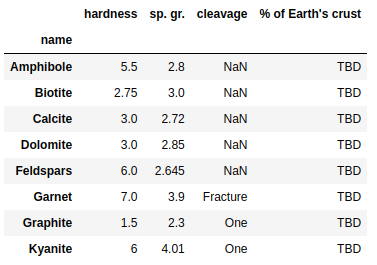</div>

In [ ]:
df_632 = df3.copy()
# write your code here
...

###BEGIN SOLUTION TEMPLATE=

df_632.index = df_632.name
df_632.drop('name',axis=1, inplace=True)
df_632.drop('new_column',axis=1,inplace=True)
df_632.drop('test',inplace=True)
df_632.drop('test',axis=1,inplace=True)
df_632["% of Earth's crust"] = 'TBD'
###END SOLUTION


print(df_632.head(10))

In [ ]:
###BEGIN HIDDEN TESTS
df_sol = df3.copy()
df_sol.index = df_sol.name
df_sol.drop('name',axis=1, inplace=True)
df_sol.drop('new_column',axis=1,inplace=True)
df_sol.drop('test',inplace=True)
df_sol.drop('test',axis=1,inplace=True)
df_sol["% of Earth's crust"] = 'TBD'

assert df_sol.equals(df_632), '6.3.2 - Incorrect answer.\
Make sure to use inplace=True and axis=1 for removing columns'
###END HIDDEN TESTS

<h4>Accessing and modifying <code>DataFrame</code> values</h4><br><div style="text-align: justify">Now that we created our table, we want to be able to access and modify the individual values within it. This way we could add the missing values to the <i>'cleavage'</i> column. There are many ways to do this because <b><code>numpy</code></b> and standard Python functions are often still applicable on <b><code>pandas</code></b> data structures. However, there is a difference in processing speed. Therefore, when accessing or modifying data, try to use <b><code>pandas</code></b> functions, such as: <b><code>.iat()</code></b>, <b><code>.at()</code></b>, <b><code>.iloc()</code></b>, and <b><code>.loc()</code></b> instead of using the common <b><code>[]</code></b> square bracket syntax, as they might raise some warnings:</div>

In [ ]:
df3_cleaned.cleavage[1]='One' # warning

df3_cleaned # note that the value still changed, but avoid doing so

<h4><code>.iat()</code> vs <code>.at()</code> vs <code>.iloc()</code> vs <code>.loc()</code></h4><br><div style="text-align: justify">In <a href = "https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-at-vs-iat">this discussion in stackoverflow</a>, they point out some differences between these methods. To keep in mind, <b><code>.iat()</code></b> and <b><code>.at()</code></b> are the fastest ones, but they only return scalars (one element), while <b><code>.loc()</code></b> and <b><code>.iloc()</code></b> can access several elements at the same time. Lastly, <b><code>.iat()</code></b> and <b><code>.iloc</code></b> use indexes (numbers), while <b><code>.at()</code></b> and <b><code>.loc()</code></b> use labels. For more information, check the stackoverflow discussion.</div>

In [ ]:
# accessing values using arrays as index with .iloc()
# only method that allows arrays in both rows and cols

indx_array_row = np.array([0,1,2])
indx_array_col = np.array([0,1,2,3])

df3_cleaned.iloc[indx_array_row[:2],indx_array_col[:3]]

In [ ]:
# accessing values with .loc(), only rows are allowed to be arrays
df3_cleaned.loc[indx_array_row[:2],'hardness']

In [ ]:
# or multiple columns with .loc():
df3_cleaned.loc[indx_array_row[:2],['hardness', 'cleavage']]

In [ ]:
# accessing values with .at(), no arrays allowed, only labels
df3_cleaned.at[0, 'hardness'] # row 0, 'hardness' column

# note that using 0 will work since we do not have labels for the rows
# so their labels are their index

In [ ]:
# if we were to change the index of this df to their names
df3_cleaned.index = df3_cleaned.name

# and delete column 'name'

df3_cleaned.drop('name',axis=1,inplace=True)

In [ ]:
df3_cleaned

In [ ]:
# now using df.at[0,'hardness'] doesn't work since there's no row
# with label 0

df3_cleaned.at[0, 'hardness']

In [ ]:
# accessing values with .iat(), no arrays allowed, no labels allowed
# only indexes
df3_cleaned.iat[1, 2]

In [ ]:
# in case you want to know the index number of a column or row:

print(df3_cleaned.columns.get_loc('new_column')) # new_column index
print(df3_cleaned.index.get_loc('Dolomite')) # Dolomite index

In [ ]:
# since the above lines return the index of a column and row
# you can use them directly with .iat()

df3_cleaned.iat[df3_cleaned.index.get_loc('Dolomite'), df3_cleaned.columns.get_loc('new_column')]

Selecting multiple columns:

In [ ]:
df3_cleaned[['hardness','new_column']]

<div style="text-align: justify">Finally, removing a column by making a copy and re-assigning the original variable as its copy. (Alternative to <b><code>inplace=True</code></b>)</div>

In [ ]:
df3_cleaned = df3_cleaned.drop('new_column', axis=1)
df3_cleaned

<div class="alert alert-block alert-info"><b>(Searching/Fixing) Exercise 6.3.3</b><br><br><div style="text-align: justify">A geologist wrote a line of code to know how many of the listed minerals have a hardness greater than or equal to $3$. However, something is not correct in his code... could you maybe fix it? There is a syntax error as well as a semantic error.</div></div>

In [ ]:
def count_minerals(df, minimal_hardness):
    amount_of_minerals = len(df(df.hardness.gt(minimal_hardness)))
    return amount_of_minerals

###BEGIN SOLUTION TEMPLATE=
def count_minerals(df, minimal_hardness):
    amount_of_minerals = len(df[df.hardness.ge(minimal_hardness)])
    return amount_of_minerals                           
###END SOLUTION            
      
print(df3_cleaned.head(10))
print(f'Amount of minerals with hardness >= 3: {count_minerals(df3_cleaned, 3)}')

In [ ]:
###BEGIN HIDDEN TESTS
assert count_minerals(df3_cleaned, 4) == 4, '6.3.3 - Incorrect answer'
###END HIDDEN TESTS

<div style="text-align: justify">The above exercise might look like a silly one, but take some time to analyze it carefully... what is happening there? Break down each part of that line of code to understand it properly.</div>

<div id="importing"></div><br><h3>6.4 Importing data into <code>DataFrames</code> and exploring its attributes</h3><br><div style="text-align: justify"><b><code>pandas</code></b> provides many functions to import data into <b><code>dataframes</code></b>, such as <b><code>read_csv()</code></b> to read delimited text files, or <b><code>read_excel()</code></b> for Excel or OpenDocument spreadsheets. <b><code>read_csv()</code></b> provides options that allow you to filter the data, such as specifying the separator/delimiter, the lines that form the headers, which rows to skip, etc. Let's analyze the <b><code>mineral_properties.txt</code></b>. Below a screenshot of it:<br><br></div>
    
    
    
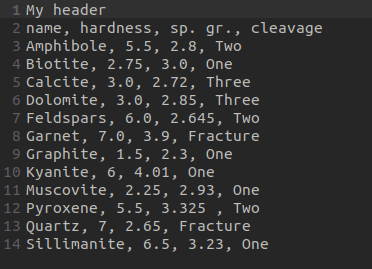</div>

In [ ]:
# below we import the .txt

path = '../resource/lib/publicdata/'
df4 = pd.read_csv(path + 'mineral_properties.txt',sep=',',header=[1], 
                  skiprows=None, index_col=0)

# we indicate that the separator is the comma "sep=','"
# we indicate the header (what should be the columns names) is in the second line "header=[1]"
# we indicate to not skip any rows "skiprows=None"
# we indicate the first column should be the index of the rows "index_col=0"

df4

In [ ]:
# note that if we try to call any of the columns from df4
# we will get an error

df4['hardness']

Do you know why?

<b>Answer</b> ...

In case you were not able to answer the above question, let's look into <b><code>df4.columns</code></b>

In [ ]:
df4.columns

<div style="text-align: justify">You see there are spaces at the beginning of each column name... this happens because that's how people usually type, with commas followed by a space. We could use the <b><code>skipinitialspace = True</code></b> from the <b><code>pd.read_csv()</code></b> function to avoid this. Let's try it out:</div>

In [ ]:
df4 = pd.read_csv(path + 'mineral_properties.txt',sep=',',header=[1], 
                  skiprows=None, index_col=0, skipinitialspace=True)
print(df4.columns)

Ok, much better!

<div id="statistics"></div><br><h3>6.5 Statistics with <b><code>pandas</code></b></h3><br><div style="text-align: justify">Recall some functions such as <b><code>np.mean()</code></b> and <b><code>np.max()</code></b>; these functions can be used to calculate a row's or column's statistics. Say you want to know what's the average <i>hardness</i> of the different minerals:</div>

In [ ]:
df4['hardness'].mean()

<div style="text-align: justify">Often we don't know much about the data, and printing all the values is inconvenient. In that case, it's wise to take a look at some of its attributes first.</div>

In [ ]:
# see the labels of the columns and rows
print(df4.columns)
print('----------------------')
print(df4.index)

In [ ]:
# df4.info is similar to print(df4.info)
df4.info

<h3>Deep copying a <code>DataFrame</code></h3><br><div style="text-align: justify">As you have seen in Notebook 4, shallow copies can be troublesome if you're not aware of it. In <b><code>pandas</code></b>, it's the same story.<br><br>To make a deep copy use the <b><code>DataFrame.copy(deep=True)</code></b> function.</div>

In [ ]:
df_deep = df4.copy(deep=True)

Now, altering <b><code>df_deep</code></b> will not alter <b><code>df4</code></b>; and vice-versa.

<div class="alert alert-block alert-info"><b>(Searching) Exercise 6.5.1</b><br><br><div style="text-align: justify">A geologist is interested in the tallest mountain chains around Earth. For that, he created the <code>tallest_mountains.csv</code> table, containing information on all mountains above $8000$ meters. Your task is to do the following $5$ assignments.<br><br>1) Read the <code>tallest_mountains.csv</code> file.<br>2) What are the names of the columns?<br>3) What is the height of the tallest mountain?<br>4) What is the row number (or index) of this mountain?<br>5) What is the name of the tallest mountain in the dataset?<br><br><b>Hard-coded answers won't be accepted. Use <code>pandas</code> functions to answer the questions.</b><br><br><i>Source for this and next exercises: <a href="https://en.wikipedia.org/wiki/List_of_mountains_by_elevation">Wikipedia</a></i></div></div>

In [ ]:
''' write your code here, do not change any variable name '''

df8000 = ... # 1) read the file
cols = ... # 2) name of columns
max_height = ... # 3) height of tallest mountain
indxmax = ... # 4) index of the row containing 'max_height'
tallest_mountain = ... # 5) name of the tallest mountain

###BEGIN SOLUTION TEMPLATE=
df8000 = pd.read_csv(path + 'tallest_mountains.csv')
cols = df8000.columns
max_height = df8000['Metres'].max() 
indxmax = df8000['Metres'].idxmax() 
tallest_mountain = df8000.loc[indxmax,'Mountain']
###END SOLUTION

print(df8000.head())

In [ ]:
###BEGIN HIDDEN TESTS
df_sol = pd.read_csv(path + 'tallest_mountains.csv')
cols_sol = df_sol.columns
max_height_sol = df_sol['Metres'].max() 
indxmax_sol = df_sol['Metres'].idxmax() 
tallest_mountain_sol = df_sol.loc[indxmax_sol,'Mountain']

assert df_sol.equals(df8000) and cols_sol.equals(cols) and max_height_sol == max_height and \
        indxmax_sol == indxmax and tallest_mountain_sol == tallest_mountain, \
    '6.5.1 - Incorrect answer, did you use idxmax for the 4th problem?'
###END HIDDEN TESTS

<div class="alert alert-block alert-info"><b>(Searching) Exercise 6.5.2</b><br><br><div style="text-align: justify">Now, our geologist friend got another table with all mountains above $7000$ meters, it's in the <code>mountains_above_7000m_copy.csv</code> file. Your task is to do the following $6$ assignments.<br><br>1) Read the <code>mountains_above_7000m_copy.csv</code> file.<br>2) Remove the column describing the mountain range they belong.<br>3) Append <code>df8000</code> to this.<br>4) Fix the row-indexing issue.<br>5) Create a <code>Series</code> indicating which entries of 'Feet' are missing.<br><i>Hint: Use the <code>.isnull()</code> function</i><br>6) Add the values that are missing in the 'Feet' column, use $1$ mtr = $3.28084$ feet.<br><i>Hint2: Use the <code>.mask()</code> function, more info <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html">here</a>, or the <code>.fillna()</code> function.</i></div></div>

In [ ]:
''' write your code here, do not change any variable name '''

df7000 = ... # 1
df7000_norange = ... # 2
df_concat = ... # 3

#check what you have now
print(df_concat)

In [ ]:
''' write the rest of your code here, do not change any variable name '''

df_reset = ... # 4
missing_feet_series = ... # 5
df_reset["Feet"] = ... # 6
print(df_reset) 

###BEGIN SOLUTION TEMPLATE=
df7000 = pd.read_csv(path + 'mountains_above_7000m_copy.csv', encoding_errors='ignore') # 1
df7000_norange = df7000.drop('Range', axis=1) # 2
df_concat = pd.concat([df7000_norange,df8000]) # 3
df_reset = df_concat.reset_index(drop=True) # 4
missing_feet_series = df_reset["Feet"].isnull() # 5
df_reset["Feet"] = df_reset["Feet"].mask(missing_feet_series, df_reset["Metres"]*3.28084) # 6
###END SOLUTION

In [ ]:
###BEGIN HIDDEN TESTS
df_sol = pd.read_csv(path + 'tallest_mountains.csv')

df7000_sol = pd.read_csv(path + 'mountains_above_7000m_copy.csv', encoding_errors='ignore') # 1
df7000_norange_sol = df7000_sol.drop('Range', axis=1) # 2
df_concat_sol = pd.concat([df7000_norange_sol,df_sol]) # 3
df_reset_sol = df_concat_sol.reset_index(drop=True) # 4
missing_feet_series_sol = df_reset_sol["Feet"].isnull() # 5
with_feet_series_sol = df_reset_sol["Feet"].mask(missing_feet_series_sol, df_reset_sol["Metres"]*3.28084) # 6
df_reset_sol["Feet"] = with_feet_series_sol

or_df7000_sol = pd.read_csv(path + 'mountains_above_7000m_copy.csv', encoding_errors='ignore') # 1
or_df7000_norange_sol = or_df7000_sol.drop('Range', axis=1) # 2
or_df_concat_sol = pd.concat([df_sol,or_df7000_norange_sol]) # 3
or_df_reset_sol = or_df_concat_sol.reset_index(drop=True) # 4
or_missing_feet_series_sol = or_df_reset_sol["Feet"].isnull() # 5
or_with_feet_series_sol = or_df_reset_sol["Feet"].mask(or_missing_feet_series_sol, or_df_reset_sol["Metres"]*3.28084) # 6
or_df_reset_sol["Feet"] = or_with_feet_series_sol

assert df_reset_sol.equals(df_reset) or or_df_reset_sol.equals(df_reset), '6.5.2 - Incorrect answer'
###END HIDDEN TESTS

<div class="alert alert-block alert-info"><b>(Searching) Exercise 6.5.3</b><br><br><div style="text-align: justify">Now that our geologist friend has all this information, he wants to know how many of these mountains are claimed by China. Can you help him out? <i><br><br>Hint: you need to find out which elements in the appropriate column contains the string 'China'.</i></div></div>

In [ ]:
''' write your code here, do not change any variable name '''

# you only need one line of code
china_mountains = ...

###BEGIN SOLUTION TEMPLATE=
china_mountains = df_reset["Location and Notes"].str.contains("China", case=True).sum()
###END SOLUTION

print(china_mountains)

In [ ]:
###BEGIN HIDDEN TESTS
df_sol = pd.read_csv(path + 'tallest_mountains.csv')

df7000_sol = pd.read_csv(path + 'mountains_above_7000m_copy.csv', encoding_errors='ignore') # 1
df7000_norange_sol = df7000_sol.drop('Range', axis=1) # 2
df_concat_sol = pd.concat([df7000_norange_sol,df_sol]) # 3
df_reset_sol = df_concat_sol.reset_index(drop=True) # 4
missing_feet_series_sol = df_reset_sol["Feet"].isnull() # 5
with_feet_series_sol = df_reset_sol["Feet"].mask(missing_feet_series_sol, df_reset_sol["Metres"]*3.28084) # 6
df_reset_sol["Feet"] = with_feet_series_sol

china_mountains_sol = df_reset_sol["Location and Notes"].str.contains("China", case=True).sum()
assert china_mountains_sol == china_mountains, '6.5.3 - Incorrect answer'
###END HIDDEN TESTS

<div class="alert alert-block alert-danger"><b>Additional study material:</b><br><br><li><a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series">Official pandas Documentation (Series)</a></li><li><a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame">Official pandas Documentation (DataFrame)</a></li><li><a href = "https://ggbaker.ca/732/content/pandas-speed.html">Note on processing speed</a></li><li><a href = "https://realpython.com/pandas-python-explore-dataset/">Real Python</a></li></div>

<h4>After this Notebook you should be able to:</h4>


- understand <b><code>Series</code></b> and <b><code>DataFrames</code></b>
- concatenate <b><code>DataFrames</code></b>
- work with different labels of a <b><code>DataFrame</code></b>
- drop unwanted rows and columns
- access and modify values within your <b><code>DataFrame</code></b>
- import data into a <b><code>pandas DataFrame</code></b>
- manipulate a <b><code>DataFrame</code></b> in several important ways